In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from cleanser import *

In [148]:
fights = pd.read_csv('raw_total_fight_data.csv', sep=';')

In [149]:
fights.Winner.isnull().sum()

83

In [4]:
#print(fights.columns)

In [151]:
cleanser = RawFightsCleanser()

In [152]:
fights = cleanser.cleanse_column_names(fights)

In [7]:
#print(fights.columns)

In [8]:
fights = cleanser.split_composite_columns(fights)

In [9]:
#print(fights.columns)

In [158]:
columns1 = fights.columns.copy()

In [161]:
fights = cleanser.load_and_cleanse('raw_total_fight_data.csv', sep=';')

In [12]:
#print(fights.columns)

In [13]:
columns2 = fights.columns.copy()

In [14]:
set(columns1) == set(columns2)

False

In [15]:
# To make it easier to read and deal with, let's add a loser column.

In [16]:
def find_loser(row):
    if row.winner == row.r_fighter:
        return row.b_fighter
    elif row.winner == row.b_fighter:
        return row.r_fighter
    else:
        return 'None'

In [17]:
fights['loser'] = fights.apply(find_loser, axis=1)

In [18]:
# Just curious to look at Royce Gracie's fights.

In [19]:
fights[(fights.r_fighter == 'Royce Gracie') | (fights.b_fighter == 'Royce Gracie')][['winner', 'win_by']]

,winner,win_by
4590,Matt Hughes,KO/TKO
5099,None,Other
5107,Royce Gracie,Submission
5109,Royce Gracie,Submission
5113,Royce Gracie,Submission
5117,Royce Gracie,Submission
5121,Royce Gracie,KO/TKO
5122,Royce Gracie,Submission
5124,Royce Gracie,Submission
5128,Royce Gracie,Submission


In [20]:
# just curious - how many fights include Gracies?
is_gracie = fights.apply(lambda row: 'gracie' in row.r_fighter.lower() or 'gracie' in row.b_fighter.lower(), axis=1)
fights[is_gracie][['r_fighter', 'b_fighter', 'winner', 'loser']]

,r_fighter,b_fighter,winner,loser
177,Alex Caceres,Kron Gracie,Kron Gracie,Alex Caceres
2818,Tim Kennedy,Roger Gracie,Tim Kennedy,Roger Gracie
3816,Matt Hughes,Renzo Gracie,Matt Hughes,Renzo Gracie
3875,Joey Beltran,Rolles Gracie,Joey Beltran,Rolles Gracie
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie
5099,Ken Shamrock,Royce Gracie,None,None
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo


In [21]:
# Let's write functions to get the fights for any given fighter, and their numeric record.

In [22]:
def get_fights_for_fighter(fighter_name, fights_df = fights):
    return fights_df[(fights_df.r_fighter == fighter_name) | (fights_df.b_fighter == fighter_name)]

In [23]:
def get_record(fighter_name, fights_df = fights):
    record = get_fights_for_fighter(fighter_name, fights_df)
    summary = {}
    summary['wins'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['loser'] == fighter_name).sum()
    summary['draws'] = (((fights_df['r_fighter'] == fighter_name) | (fights_df['b_fighter'] == fighter_name) ) & (fights_df['winner'] == 'None')).sum()
    summary['win loss ratio'] = summary ['wins'] / (summary['wins'] + summary['losses'])
    
    return summary 

In [24]:
get_fights_for_fighter('Royce Gracie')[['winner', 'win_by']]

,winner,win_by
4590,Matt Hughes,KO/TKO
5099,None,Other
5107,Royce Gracie,Submission
5109,Royce Gracie,Submission
5113,Royce Gracie,Submission
5117,Royce Gracie,Submission
5121,Royce Gracie,KO/TKO
5122,Royce Gracie,Submission
5124,Royce Gracie,Submission
5128,Royce Gracie,Submission


In [25]:
print(get_record('Royce Gracie'))

{'wins': 11, 'losses': 1, 'draws': 1, 'win loss ratio': 0.9166666666666666}


In [26]:
print(get_record('Matt Hughes'))

{'wins': 18, 'losses': 7, 'draws': 0, 'win loss ratio': 0.72}


In [27]:
get_fights_for_fighter('Matt Hughes')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
3441,Josh Koscheck,KO/TKO,Matt Hughes
3667,BJ Penn,KO/TKO,Matt Hughes
3742,Matt Hughes,Submission,Ricardo Almeida
3816,Matt Hughes,KO/TKO,Renzo Gracie
4029,Matt Hughes,Decision - Unanimous,Matt Serra
4231,Thiago Alves,KO/TKO,Matt Hughes
4313,Georges St-Pierre,Submission,Matt Hughes
4461,Matt Hughes,Decision - Unanimous,Chris Lytle
4502,Georges St-Pierre,KO/TKO,Matt Hughes
4536,Matt Hughes,KO/TKO,BJ Penn


In [28]:
get_fights_for_fighter('Georges St-Pierre')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
793,Georges St-Pierre,Submission,Michael Bisping
2660,Georges St-Pierre,Decision - Split,Johny Hendricks
2923,Georges St-Pierre,Decision - Unanimous,Nick Diaz
3047,Georges St-Pierre,Decision - Unanimous,Carlos Condit
3552,Georges St-Pierre,Decision - Unanimous,Jake Shields
3644,Georges St-Pierre,Decision - Unanimous,Josh Koscheck
3835,Georges St-Pierre,Decision - Unanimous,Dan Hardy
3997,Georges St-Pierre,Decision - Unanimous,Thiago Alves
4092,Georges St-Pierre,KO/TKO,BJ Penn
4191,Georges St-Pierre,Decision - Unanimous,Jon Fitch


In [29]:
get_record('Georges St-Pierre')

{'wins': 20, 'losses': 2, 'draws': 0, 'win loss ratio': 0.9090909090909091}

In [30]:
get_record('Conor McGregor')

{'wins': 9, 'losses': 2, 'draws': 0, 'win loss ratio': 0.8181818181818182}

In [31]:
# Let's do some exploration of some attributes

<AxesSubplot:xlabel='r_kd', ylabel='count'>

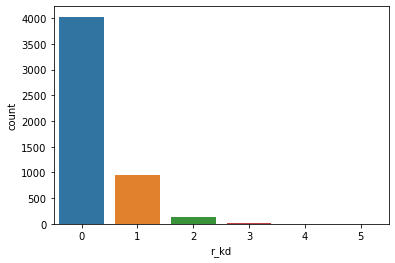

In [32]:
sns.countplot(data=fights, x='r_kd')

In [33]:
fights.r_kd.value_counts()

0    4029
1     960
2     133
3      18
5       2
4       2
Name: r_kd, dtype: int64

<AxesSubplot:xlabel='b_kd', ylabel='count'>

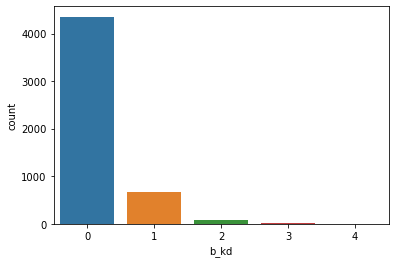

In [34]:
sns.countplot(fights.b_kd)

In [35]:
fights.b_kd.value_counts()

0    4352
1     680
2      91
3      18
4       3
Name: b_kd, dtype: int64

In [36]:
# Is the R or B player more likely to win?
# I forget, is one the favorite?

In [37]:
def winner_b_r(row):
    if row['winner'] == row.r_fighter:
        return 'r'
    elif row['winner'] == row.b_fighter:
        return 'b'
    else:
        return 'None' 
    

In [38]:
fights['r_b_winner'] = fights.apply(lambda row: winner_b_r(row), axis=1)

In [39]:
fights.head()[['r_fighter', 'b_fighter', 'winner', 'r_b_winner']]

,r_fighter,b_fighter,winner,r_b_winner
0,Henry Cejudo,Marlon Moraes,Henry Cejudo,r
1,Valentina Shevchenko,Jessica Eye,Valentina Shevchenko,r
2,Tony Ferguson,Donald Cerrone,Tony Ferguson,r
3,Jimmie Rivera,Petr Yan,Petr Yan,b
4,Tai Tuivasa,Blagoy Ivanov,Blagoy Ivanov,b


<AxesSubplot:xlabel='r_b_winner', ylabel='count'>

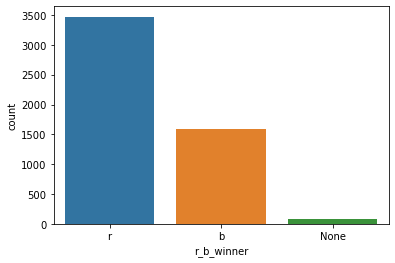

In [40]:
sns.countplot(fights.r_b_winner)

In [41]:
# Looks like R wins a lot more often the B

In [42]:
# Now some other columns

<AxesSubplot:xlabel='r_sig_str_pct', ylabel='count'>

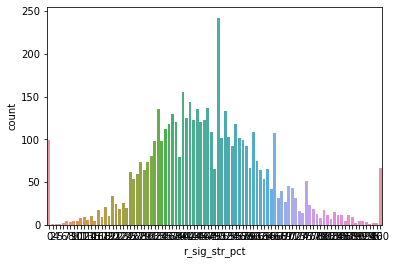

In [43]:
sns.countplot(data=fights, x="r_sig_str_pct")

<AxesSubplot:xlabel='b_sig_str_pct', ylabel='count'>

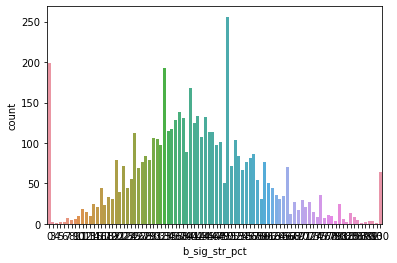

In [44]:
sns.countplot(fights.b_sig_str_pct)

In [45]:
fights.columns

Index(['r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str',
       ...
       'b_ground_att', 'r_ground_suc', 'b_ground_suc', 'r_ground_ratio',
       'b_ground_ratio', 'r_ground_pct', 'b_ground_pct', 'ground_diff',
       'loser', 'r_b_winner'],
      dtype='object', length=120)

In [46]:
[c for c in fights.columns if '_pct' in c]

['r_sig_str_pct',
 'b_sig_str_pct',
 'r_td_pct',
 'b_td_pct',
 'r_total_str_pct',
 'b_total_str_pct',
 'r_head_pct',
 'b_head_pct',
 'r_body_pct',
 'b_body_pct',
 'r_leg_pct',
 'b_leg_pct',
 'r_distance_pct',
 'b_distance_pct',
 'r_clinch_pct',
 'b_clinch_pct',
 'r_ground_pct',
 'b_ground_pct']

<AxesSubplot:xlabel='r_td_pct', ylabel='count'>

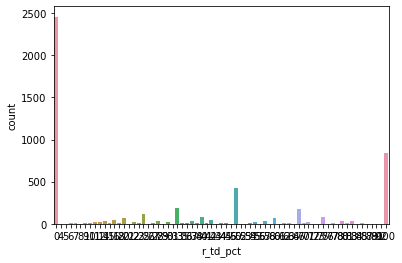

In [47]:
sns.countplot(fights.r_td_pct)

<AxesSubplot:xlabel='b_td_pct', ylabel='count'>

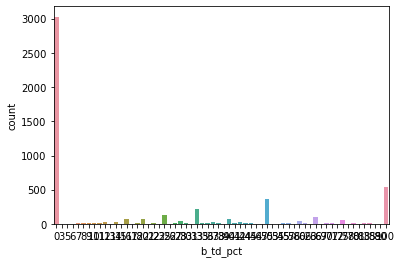

In [48]:
sns.countplot(fights.b_td_pct)

In [49]:
fights.r_td_pct.describe()

count    5144.000000
mean       32.610420
std        37.969679
min         0.000000
25%         0.000000
50%        16.000000
75%        60.000000
max       100.000000
Name: r_td_pct, dtype: float64

In [50]:
fights.r_td_pct.value_counts()

0      2456
100     837
50      426
33      189
66      177
       ... 
21        1
52        1
92        1
72        1
76        1
Name: r_td_pct, Length: 69, dtype: int64

In [51]:
# I have a feeling that between attempt, success, and percent/ratio columns, success is the most important.  The person who lands 5 out of 20 punches probably does better than the opponent who lands 1 out of 1.

In [52]:
success_columns = [c for c in fights.columns if '_suc' in c]

In [53]:
'''
for column in success_columns:
    print(column)
    sns.countplot(fights[column])
    plt.show()
'''
# None of these are normally distributed.  exponential / fat tail

'\nfor column in success_columns:\n    print(column)\n    sns.countplot(fights[column])\n    plt.show()\n'

In [54]:
# TODO:
# I wonder if some sort of different column would help.  Something simple like r_sig_strike - b_sig_strike.
# Could go back to the cleanser and have it do that.
# Then correlate that to wins.  Would that be logistic regression?
# That would answer the question of, given the data for the fight, can we predict the winner?  Not the question of, given the data on the fighters, can we predict the winner before the fight happens?

In [55]:
# TODO: significant columns
# One option is to simple remove the ones that are not significant
# TODO: See if sig_str is necessary; night need to focus on head and body
# TODO: maybe a statistical analysis of refs to see if each ref favors red or blue; only the refs that have more than say 30 fights
# to verify the hypothesis that the Referee column is not needed

In [56]:
diff_columns = [c for c in fights.columns if '_diff' in c]
diff_columns

['sig_str_diff',
 'total_str_diff',
 'td_diff',
 'head_diff',
 'body_diff',
 'leg_diff',
 'distance_diff',
 'clinch_diff',
 'ground_diff']

sig_str_diff


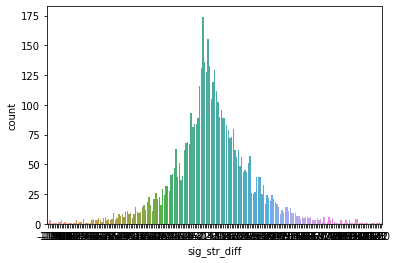

mean:   5.174572317262831
std:   24.959976650396005

total_str_diff


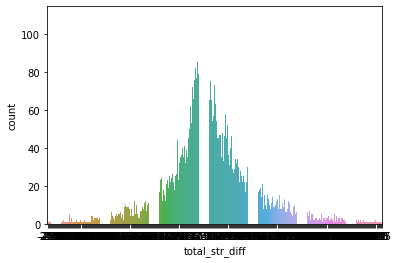

mean:   9.611003110419906
std:   45.75648972313954

td_diff


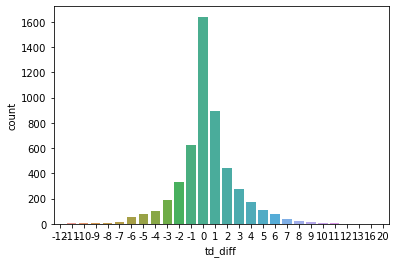

mean:   0.3495334370139969
std:   2.506283717997995

head_diff


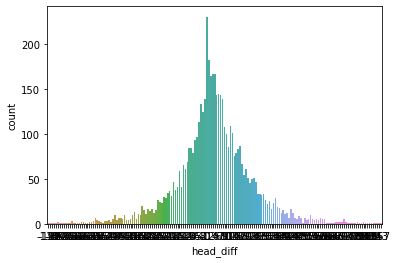

mean:   3.7323094867807156
std:   19.70423140851257

body_diff


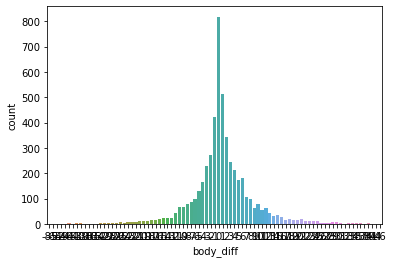

mean:   0.8505054432348367
std:   8.030154605225974

leg_diff


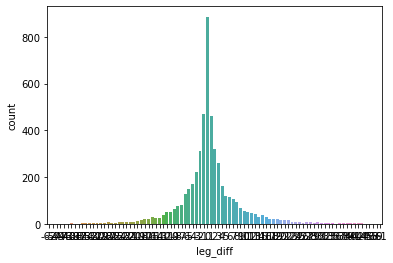

mean:   0.5917573872472783
std:   8.41792725228807

distance_diff


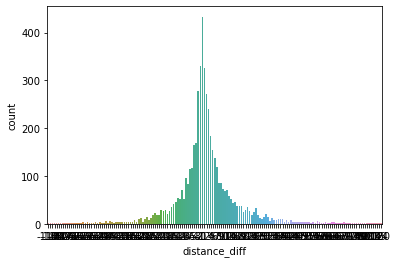

mean:   1.8596423017107309
std:   16.440600437509456

clinch_diff


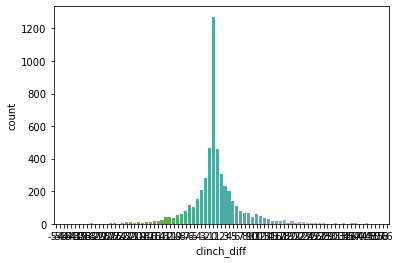

mean:   0.61450233281493
std:   7.444167163433408

ground_diff


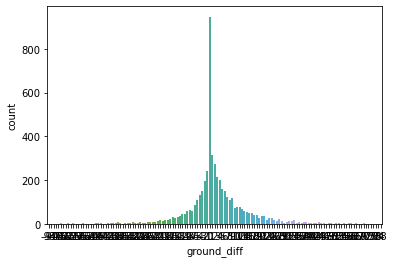

mean:   2.7004276827371694
std:   12.987118455702241



In [57]:
for column in diff_columns:
    print(column)
    sns.countplot(fights[column])
    plt.show()
    print('mean:  ', fights[column].mean())
    print('std:  ', fights[column].std())
    print()

In [58]:
for column in diff_columns:
    print(column)
    print(fights[column].value_counts().head(10))

sig_str_diff
 0    174
 3    155
 1    136
 4    133
-1    131
 7    129
 2    128
 6    119
-2    116
 8    112
Name: sig_str_diff, dtype: int64
total_str_diff
 3    109
 1     97
 7     93
 0     89
 6     86
-2     85
 4     85
 5     84
-4     82
 8     81
Name: total_str_diff, dtype: int64
td_diff
 0    1640
 1     898
-1     624
 2     442
-2     335
 3     278
-3     191
 4     174
 5     113
-4     106
Name: td_diff, dtype: int64
head_diff
 0    230
 1    182
 3    167
 4    166
 2    164
 6    144
 5    143
 7    143
 8    139
-1    139
Name: head_diff, dtype: int64
body_diff
 0    818
 1    512
-1    424
 2    345
-2    271
 3    243
-3    229
 4    214
 6    182
 5    175
Name: body_diff, dtype: int64
leg_diff
 0    886
-1    472
 1    463
 2    319
-2    310
 3    262
-3    221
-4    172
 4    162
-5    149
Name: leg_diff, dtype: int64
distance_diff
 0    433
-1    330
 1    326
-2    277
 2    272
 3    240
 4    183
-3    170
-4    166
 5    155
Name: distance_diff, dtype

In [59]:
#The success columns are "tail" distributions, but the diff columns are bell curves.  That is weird.

<AxesSubplot:xlabel='r_sig_str', ylabel='count'>

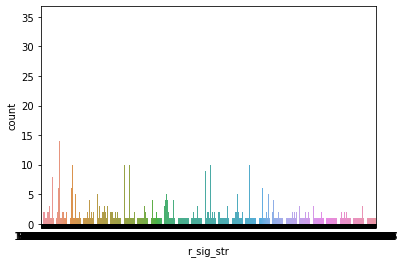

In [60]:
sns.countplot(fights.r_sig_str)

<AxesSubplot:xlabel='r_sig_str_att', ylabel='count'>

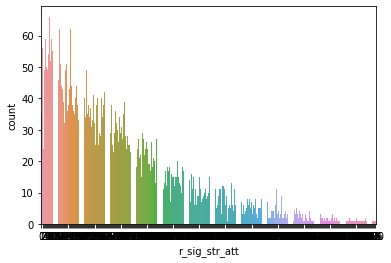

In [61]:
sns.countplot(fights.r_sig_str_att)

<AxesSubplot:xlabel='b_sig_str_att', ylabel='count'>

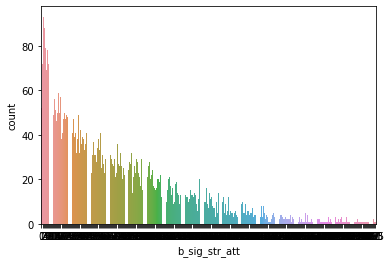

In [62]:
sns.countplot(fights.b_sig_str_att)

<AxesSubplot:xlabel='r_sig_str_suc', ylabel='count'>

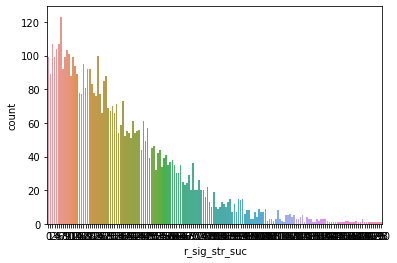

In [63]:
sns.countplot(fights.r_sig_str_suc)

<AxesSubplot:xlabel='b_sig_str_suc', ylabel='count'>

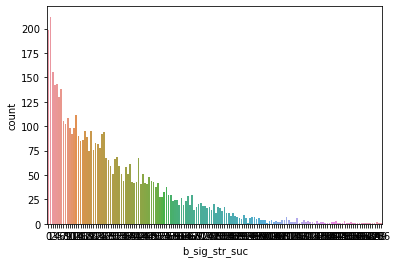

In [64]:
sns.countplot(fights.b_sig_str_suc)

<AxesSubplot:xlabel='r_sig_str_pct', ylabel='count'>

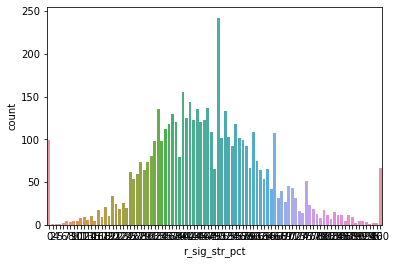

In [65]:
sns.countplot(fights.r_sig_str_pct)

<AxesSubplot:xlabel='b_sig_str_pct', ylabel='count'>

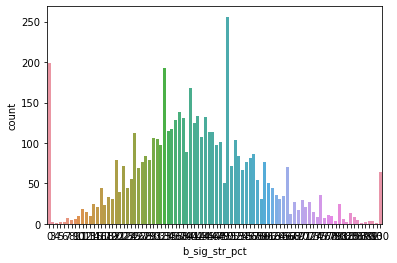

In [66]:
sns.countplot(fights.b_sig_str_pct)

<AxesSubplot:xlabel='sig_str_diff', ylabel='count'>

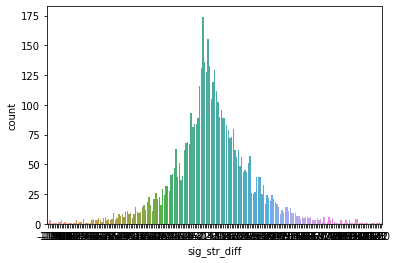

In [67]:
sns.countplot(fights.sig_str_diff)

In [68]:
cleanser.expand_column_names('sig_str')

['r_sig_str_att',
 'b_sig_str_att',
 'r_sig_str_suc',
 'b_sig_str_suc',
 'r_sig_str_ratio',
 'b_sig_str_ratio',
 'r_sig_str_pct',
 'b_sig_str_pct',
 'sig_str_diff']

In [69]:
diff_columns

['sig_str_diff',
 'total_str_diff',
 'td_diff',
 'head_diff',
 'body_diff',
 'leg_diff',
 'distance_diff',
 'clinch_diff',
 'ground_diff']

In [70]:
sig_str = cleanser.expand_column_names('sig_str')
total_str = cleanser.expand_column_names('total_str')
td = cleanser.expand_column_names('td')
head =  cleanser.expand_column_names('head')
body = cleanser.expand_column_names('body')
leg = cleanser.expand_column_names('leg')
distance = cleanser.expand_column_names('distance')
clinch = cleanser.expand_column_names('clinch')
ground = cleanser.expand_column_names('ground')

In [71]:
cols_to_graph = total_str + td + head + body + leg + distance + clinch + ground

In [72]:
cols_to_graph

['r_total_str_att',
 'b_total_str_att',
 'r_total_str_suc',
 'b_total_str_suc',
 'r_total_str_ratio',
 'b_total_str_ratio',
 'r_total_str_pct',
 'b_total_str_pct',
 'total_str_diff',
 'r_td_att',
 'b_td_att',
 'r_td_suc',
 'b_td_suc',
 'r_td_ratio',
 'b_td_ratio',
 'r_td_pct',
 'b_td_pct',
 'td_diff',
 'r_head_att',
 'b_head_att',
 'r_head_suc',
 'b_head_suc',
 'r_head_ratio',
 'b_head_ratio',
 'r_head_pct',
 'b_head_pct',
 'head_diff',
 'r_body_att',
 'b_body_att',
 'r_body_suc',
 'b_body_suc',
 'r_body_ratio',
 'b_body_ratio',
 'r_body_pct',
 'b_body_pct',
 'body_diff',
 'r_leg_att',
 'b_leg_att',
 'r_leg_suc',
 'b_leg_suc',
 'r_leg_ratio',
 'b_leg_ratio',
 'r_leg_pct',
 'b_leg_pct',
 'leg_diff',
 'r_distance_att',
 'b_distance_att',
 'r_distance_suc',
 'b_distance_suc',
 'r_distance_ratio',
 'b_distance_ratio',
 'r_distance_pct',
 'b_distance_pct',
 'distance_diff',
 'r_clinch_att',
 'b_clinch_att',
 'r_clinch_suc',
 'b_clinch_suc',
 'r_clinch_ratio',
 'b_clinch_ratio',
 'r_clinch_p

In [73]:
len(cols_to_graph)

72

In [74]:
'''for column in body:
    print(f'\n{column}')
    sns.countplot(data=fights, x=column)
    plt.show()
'''

"for column in body:\n    print(f'\n{column}')\n    sns.countplot(data=fights, x=column)\n    plt.show()\n"


r_total_str_att


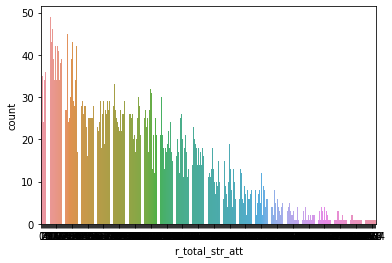


b_total_str_att


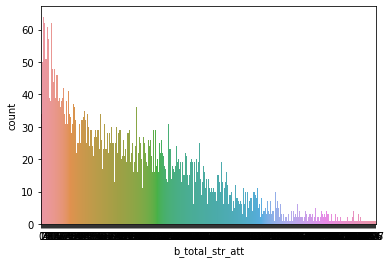


r_total_str_suc


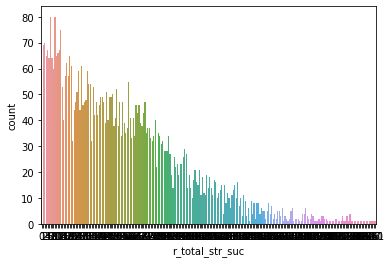


b_total_str_suc


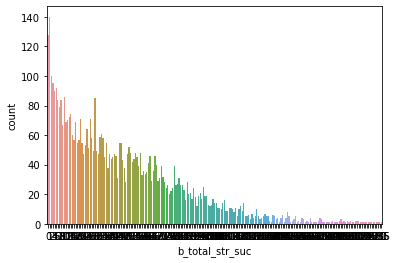


r_total_str_ratio


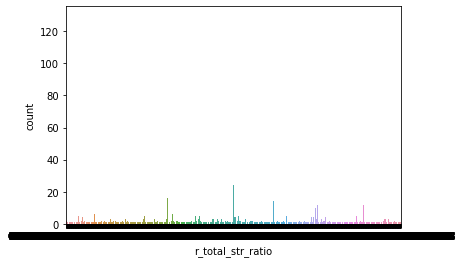


b_total_str_ratio


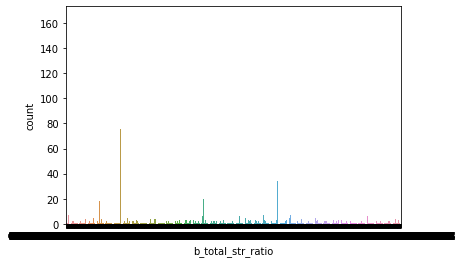


r_total_str_pct


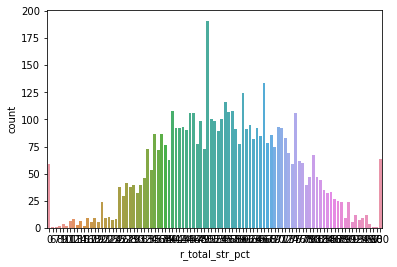


b_total_str_pct


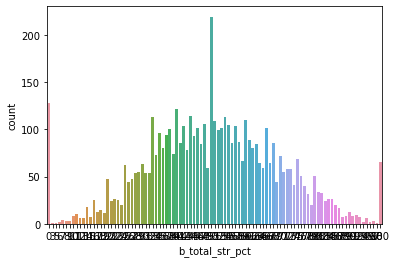


total_str_diff


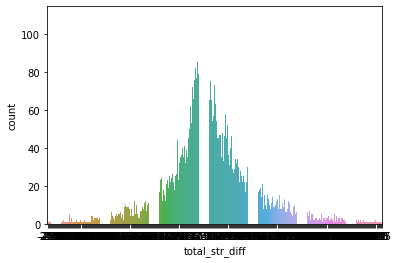


r_td_att


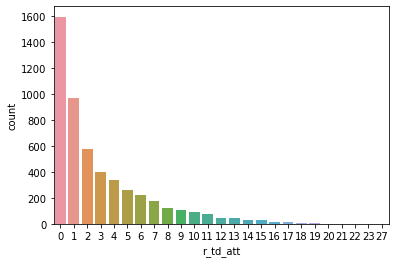


b_td_att


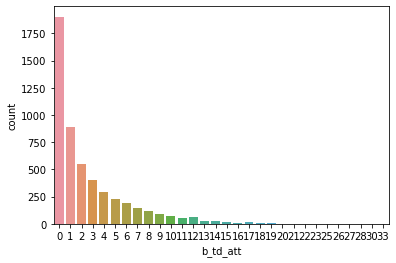


r_td_suc


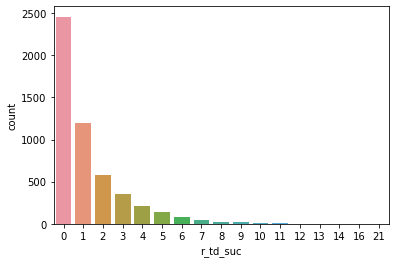


b_td_suc


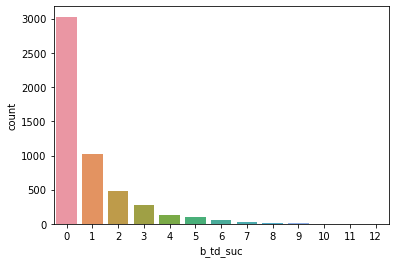


r_td_ratio


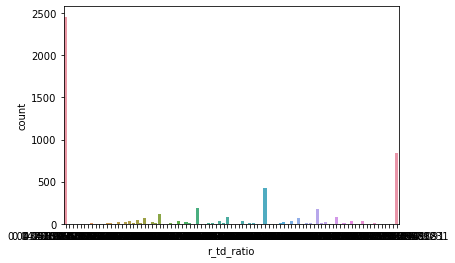


b_td_ratio


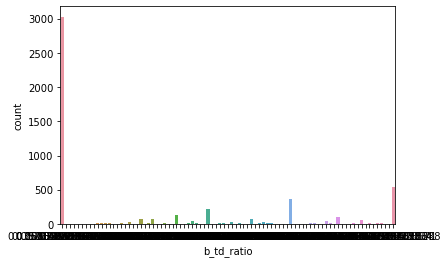


r_td_pct


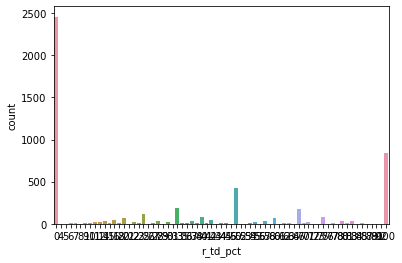


b_td_pct


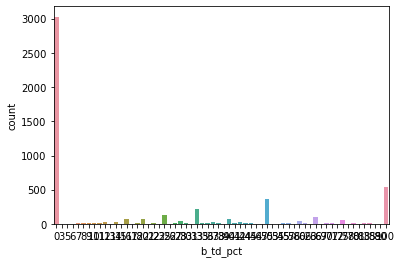


td_diff


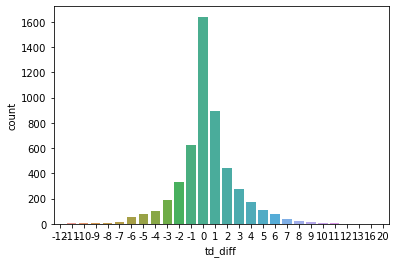


r_head_att


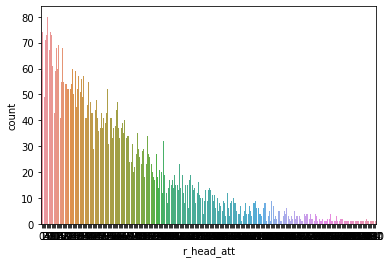


b_head_att


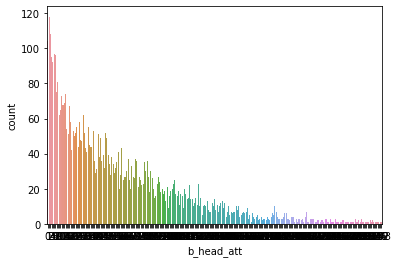


r_head_suc


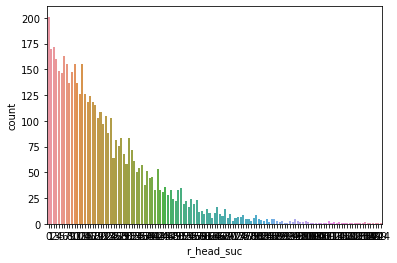


b_head_suc


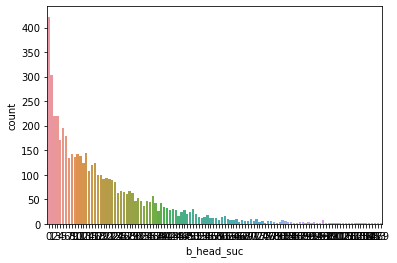


r_head_ratio


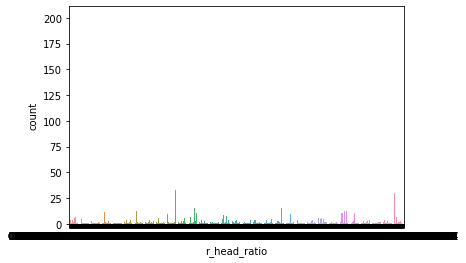


b_head_ratio


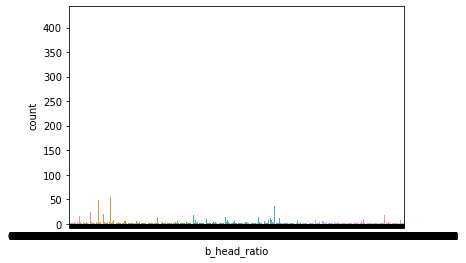


r_head_pct


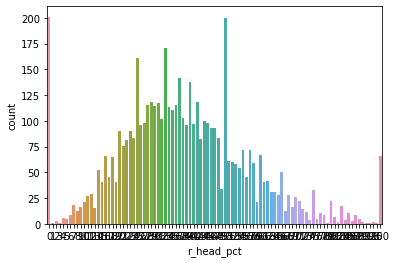


b_head_pct


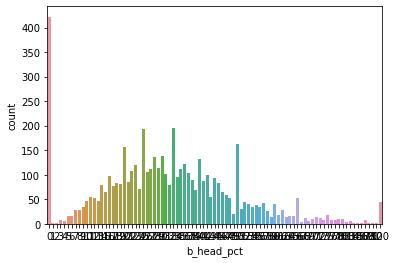


head_diff


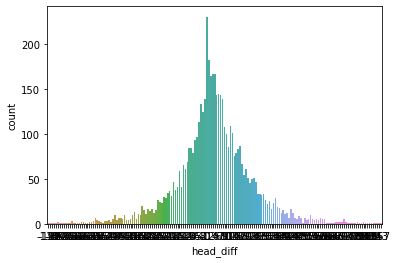


r_body_att


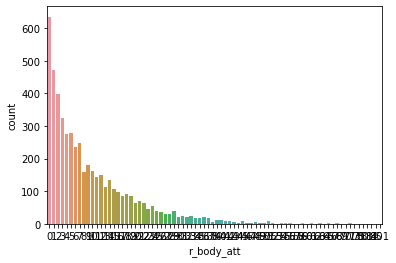


b_body_att


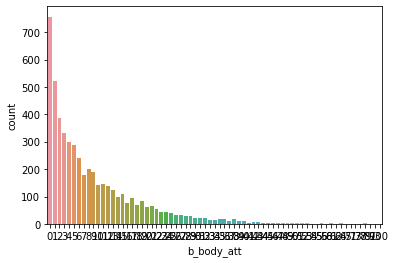


r_body_suc


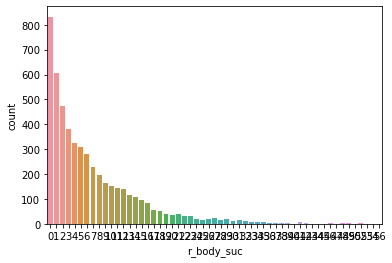


b_body_suc


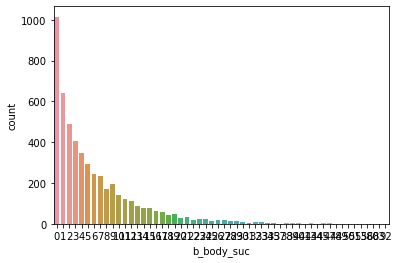


r_body_ratio


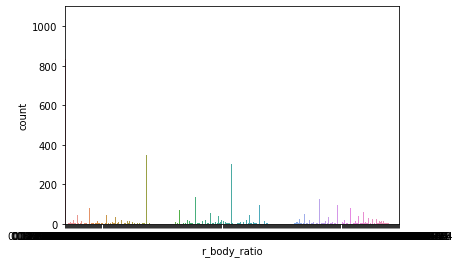


b_body_ratio


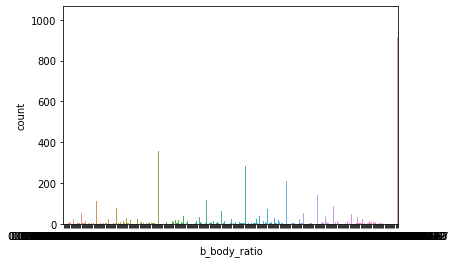


r_body_pct


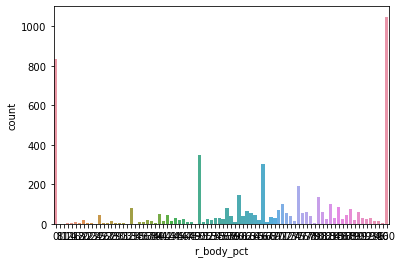


b_body_pct


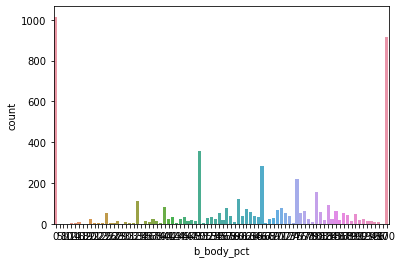


body_diff


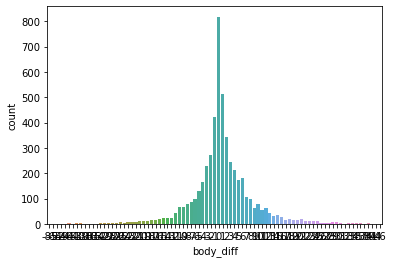


r_leg_att


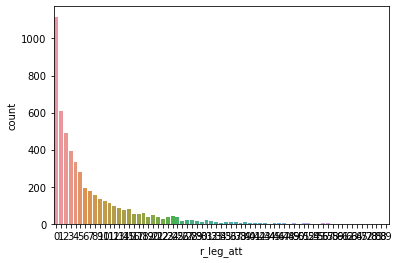


b_leg_att


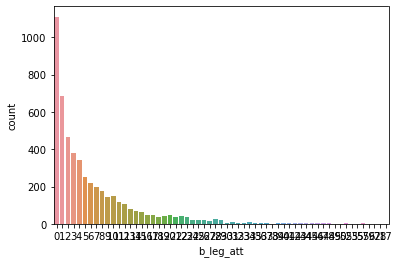


r_leg_suc


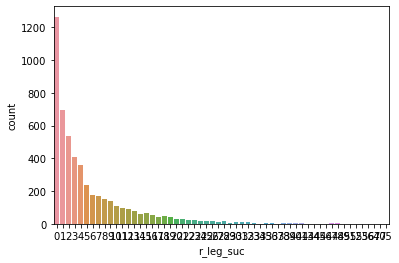


b_leg_suc


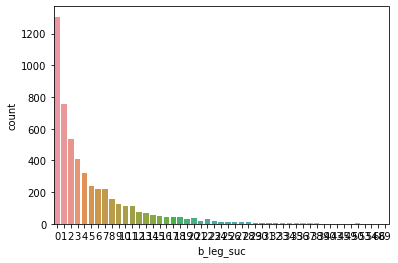


r_leg_ratio


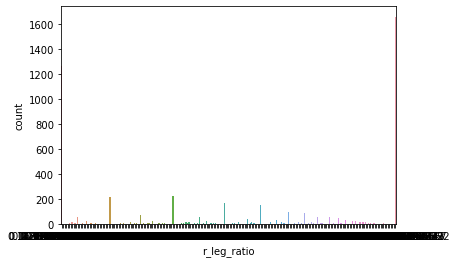


b_leg_ratio


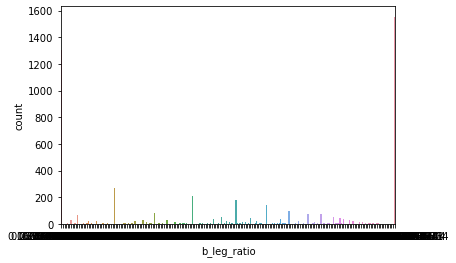


r_leg_pct


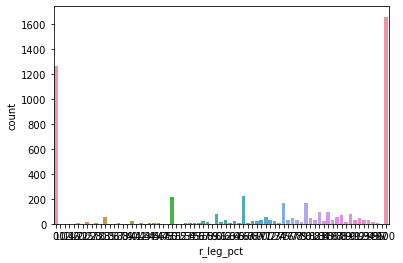


b_leg_pct


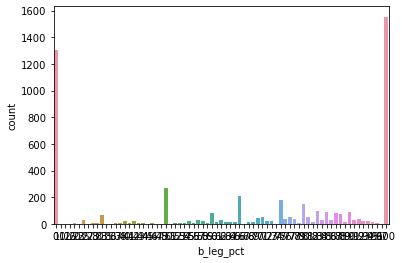


leg_diff


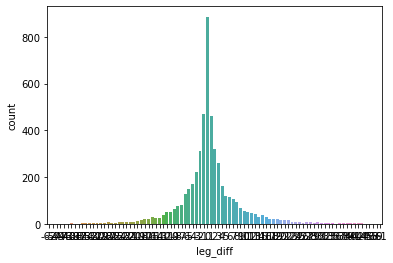


r_distance_att


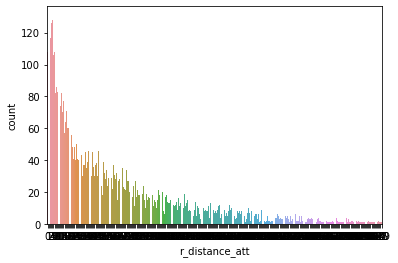


b_distance_att


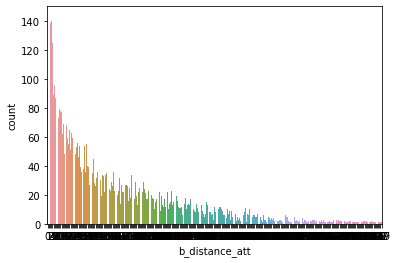


r_distance_suc


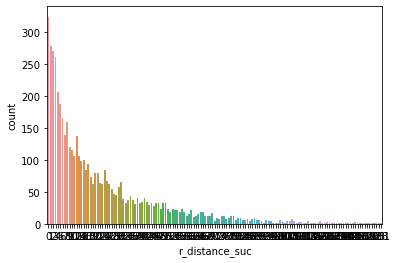


b_distance_suc


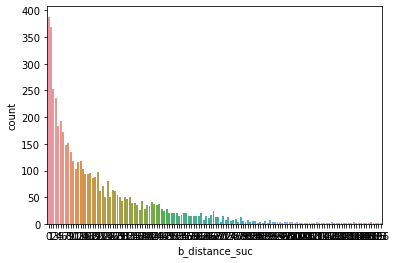


r_distance_ratio


KeyboardInterrupt: 

In [75]:
'''for column in cols_to_graph:
    print(f'\n{column}')
    sns.countplot(data=fights, x=column)
    plt.show()
    '''

It is strange that the distribution for every strike etc. is "long tail", for both sides, but the distribution for the 
difference is bell curve ish.
Why would the distro for the stats be that way anyway?  A lot of people landing few or no punches, and some landing more,
a few landing a huge amount.  It is this way for both red and blue.  I wonder what mechanism would cause that.

Hypotheses:
1 The distribution for how long matches last is exponential / fat tail.  This would give vastly more time for landing strikes in some fights that for others.
To test this, look and see if you can find out how long fights lasted.

2 Some are more focused on striking and some on grappling.  There are fewer stats for grappling.
To test this, look again at stats and see what is there for grappling.  There is a "td" state for takedowns.  See if there is anything else, and if we can tell if a fight is more grappling focused or strike focused.
Since the "td" stats are also "tail" distributed, I suspect this hypothesis will not be the reason.

In [76]:
# How can I found the length of time a fight lasts?

In [77]:
fights[['last_round', 'last_round_time', 'format', 'fight_type']].head(20)

,last_round,last_round_time,format,fight_type
0,3,4:51,5 Rnd (5-5-5-5-5),UFC Bantamweight Title Bout
1,2,0:26,5 Rnd (5-5-5-5-5),UFC Women's Flyweight Title Bout
2,2,5:00,3 Rnd (5-5-5),Lightweight Bout
3,3,5:00,3 Rnd (5-5-5),Bantamweight Bout
4,3,5:00,3 Rnd (5-5-5),Heavyweight Bout
5,3,5:00,3 Rnd (5-5-5),Women's Strawweight Bout
6,3,5:00,3 Rnd (5-5-5),Bantamweight Bout
7,3,5:00,3 Rnd (5-5-5),Women's Strawweight Bout
8,1,4:06,3 Rnd (5-5-5),Featherweight Bout
9,3,5:00,3 Rnd (5-5-5),Women's Strawweight Bout


<AxesSubplot:xlabel='last_round', ylabel='count'>

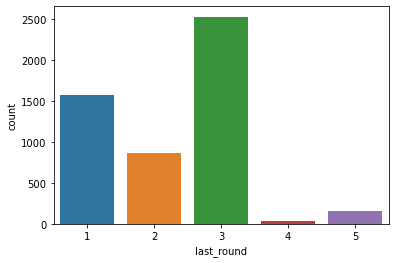

In [78]:
sns.countplot(fights.last_round)

In [79]:
fights.last_round_time.value_counts()

5:00     2315
4:59       32
3:00       29
1:54       23
2:38       20
         ... 
9:45        1
9:51        1
7:40        1
11:01       1
7:00        1
Name: last_round_time, Length: 333, dtype: int64

In [80]:
fights.format.value_counts()

3 Rnd (5-5-5)           4502
5 Rnd (5-5-5-5-5)        423
1 Rnd + OT (12-3)         79
No Time Limit             37
3 Rnd + OT (5-5-5-5)      22
1 Rnd (20)                20
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               11
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd + OT (31-5)          1
1 Rnd + OT (27-3)          1
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
1 Rnd + OT (30-3)          1
Name: format, dtype: int64

In [81]:
# I can make guesses about what each row above means, but I don't think I can be certain about all of them.
# It would probably take a long time to try to convert each one to a time limit.
# The benefit seems low.  All it would do is confirm or rule out a hypothesis and probably not affect the outcome
# of the analysis.
# => For now, continue with the plan to do logistic regression on the "diff" columns. (8/15/2020)
# Afterward, come back and go down this rabbit trail.

In [82]:
fights[fights.format == 'No Time Limit'] [['last_round', 'last_round_time', 'format', 'fight_type', 'r_fighter', 'b_fighter', 'winner', 'loser']]

,last_round,last_round_time,format,fight_type,r_fighter,b_fighter,winner,loser
5107,1,15:49,No Time Limit,UFC 4 Tournament Title Bout,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn
5108,1,0:52,No Time Limit,Open Weight Bout,Dan Severn,Marcus Bossett,Dan Severn,Marcus Bossett
5109,1,5:32,No Time Limit,Open Weight Bout,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney
5110,1,1:45,No Time Limit,Open Weight Bout,Dan Severn,Anthony Macias,Dan Severn,Anthony Macias
5111,1,4:47,No Time Limit,Open Weight Bout,Steve Jennum,Melton Bowen,Steve Jennum,Melton Bowen
5112,1,2:44,No Time Limit,Open Weight Bout,Keith Hackney,Joe Son,Keith Hackney,Joe Son
5113,1,3:49,No Time Limit,Open Weight Bout,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief
5114,1,2:13,No Time Limit,Open Weight Bout,Guy Mezger,Jason Fairn,Guy Mezger,Jason Fairn
5115,1,1:27,No Time Limit,UFC 3 Tournament Title Bout,Steve Jennum,Harold Howard,Steve Jennum,Harold Howard
5116,1,4:34,No Time Limit,Open Weight Bout,Ken Shamrock,Felix Lee Mitchell,Ken Shamrock,Felix Lee Mitchell


In [83]:
# Now go back to the idea of how fights end and investigate what is more effective.

In [84]:
fights.win_by.value_counts()

Decision - Unanimous       1737
KO/TKO                     1647
Submission                 1083
Decision - Split            486
TKO - Doctor's Stoppage      70
Decision - Majority          56
Overturned                   35
DQ                           15
Could Not Continue           13
Other                         2
Name: win_by, dtype: int64

In [85]:
fights['was_sub'] = fights.win_by == 'Submission'

In [86]:
fights.was_sub.sum()

1083

In [87]:
fights.index

RangeIndex(start=0, stop=5144, step=1)

In [88]:
fights.was_sub.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: was_sub, dtype: bool

In [89]:
fights[fights.was_sub]

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner,was_sub
13,Alexander Gustafsson,Anthony Smith,0,0,72 of 151,49 of 104,47,47,73 of 152,51 of 107,...,2,5,0.666667,1.000000,66,100,-3,Alexander Gustafsson,b,True
15,Makwan Amirkhani,Chris Fishgold,0,0,9 of 27,16 of 52,33,30,18 of 36,16 of 52,...,3,0,0.750000,0.000000,75,0,3,Chris Fishgold,r,True
22,Bea Malecki,Duda Santana,0,0,19 of 71,42 of 106,26,39,30 of 82,48 of 112,...,1,2,0.500000,1.000000,50,100,-1,Duda Santana,r,True
25,Rafael Dos Anjos,Kevin Lee,0,0,60 of 111,35 of 97,54,36,75 of 126,40 of 102,...,9,1,0.818182,1.000000,81,100,8,Kevin Lee,r,True
27,Megan Anderson,Felicia Spencer,0,0,3 of 6,22 of 31,50,70,5 of 8,25 of 34,...,0,13,0.000000,0.866667,0,86,-13,Megan Anderson,b,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,Royce Gracie,Gerard Gordeau,0,0,1 of 2,0 of 0,50,0,3 of 4,0 of 0,...,1,0,1.000000,0.000000,100,0,1,Gerard Gordeau,r,True
5137,Jason DeLucia,Trent Jenkins,0,0,3 of 9,1 of 7,33,14,3 of 9,1 of 7,...,0,0,0.000000,0.000000,0,0,0,Trent Jenkins,r,True
5138,Royce Gracie,Ken Shamrock,0,0,0 of 0,0 of 0,0,0,12 of 12,0 of 0,...,0,0,0.000000,0.000000,0,0,0,Ken Shamrock,r,True
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100,50,4 of 4,16 of 20,...,1,2,1.000000,0.333333,100,33,-1,Patrick Smith,r,True


In [90]:
fights['was_sub'] = fights.win_by.apply(lambda x: 1 if x == 'Submission' else 0)

In [91]:
fights[fights.was_sub == 1]

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner,was_sub
13,Alexander Gustafsson,Anthony Smith,0,0,72 of 151,49 of 104,47,47,73 of 152,51 of 107,...,2,5,0.666667,1.000000,66,100,-3,Alexander Gustafsson,b,1
15,Makwan Amirkhani,Chris Fishgold,0,0,9 of 27,16 of 52,33,30,18 of 36,16 of 52,...,3,0,0.750000,0.000000,75,0,3,Chris Fishgold,r,1
22,Bea Malecki,Duda Santana,0,0,19 of 71,42 of 106,26,39,30 of 82,48 of 112,...,1,2,0.500000,1.000000,50,100,-1,Duda Santana,r,1
25,Rafael Dos Anjos,Kevin Lee,0,0,60 of 111,35 of 97,54,36,75 of 126,40 of 102,...,9,1,0.818182,1.000000,81,100,8,Kevin Lee,r,1
27,Megan Anderson,Felicia Spencer,0,0,3 of 6,22 of 31,50,70,5 of 8,25 of 34,...,0,13,0.000000,0.866667,0,86,-13,Megan Anderson,b,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,Royce Gracie,Gerard Gordeau,0,0,1 of 2,0 of 0,50,0,3 of 4,0 of 0,...,1,0,1.000000,0.000000,100,0,1,Gerard Gordeau,r,1
5137,Jason DeLucia,Trent Jenkins,0,0,3 of 9,1 of 7,33,14,3 of 9,1 of 7,...,0,0,0.000000,0.000000,0,0,0,Trent Jenkins,r,1
5138,Royce Gracie,Ken Shamrock,0,0,0 of 0,0 of 0,0,0,12 of 12,0 of 0,...,0,0,0.000000,0.000000,0,0,0,Ken Shamrock,r,1
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100,50,4 of 4,16 of 20,...,1,2,1.000000,0.333333,100,33,-1,Patrick Smith,r,1


In [92]:
fights[fights.was_sub]

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n            ...\n            1, 1, 1, 1, 1, 0, 1, 1, 0, 0],\n           dtype='int64', length=5144)] are in the [columns]"

In [93]:
fights.was_sub.sum()

1083

In [94]:
# So only about a fifth of the fights have ended in a submission.
# Q:  Has that changed over time?  For example, were more of the earlier fights submissions, say before people knew how to handle BJJ?

In [95]:
sns.plot(data=fights, x=index, y=was_sub)

AttributeError: module 'seaborn' has no attribute 'plot'

In [96]:
plt.plot(data=fights, x=index, y=was_sub)

NameError: name 'index' is not defined

In [97]:
fights.index

RangeIndex(start=0, stop=5144, step=1)

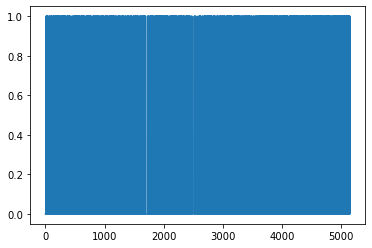

In [98]:
plt.plot([x for x in range(fights.shape[0])], fights.was_sub)

In [99]:
ws = fights.was_sub

In [100]:
ws.cumsum()

0          0
1          0
2          0
3          0
4          0
        ... 
5139    1081
5140    1082
5141    1083
5142    1083
5143    1083
Name: was_sub, Length: 5144, dtype: int64

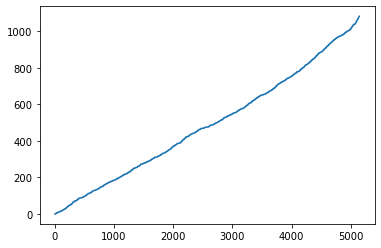

In [101]:
plt.plot([x for x in range(fights.shape[0])], fights.was_sub.cumsum())

In [102]:
# => The rate of submissions is relatively constant over time.

In [103]:
ws.tail(50)

5094    1
5095    1
5096    0
5097    0
5098    1
5099    0
5100    0
5101    0
5102    1
5103    1
5104    1
5105    0
5106    0
5107    1
5108    1
5109    1
5110    1
5111    1
5112    1
5113    1
5114    0
5115    0
5116    1
5117    1
5118    0
5119    0
5120    0
5121    0
5122    1
5123    1
5124    1
5125    0
5126    1
5127    0
5128    1
5129    1
5130    1
5131    0
5132    1
5133    0
5134    1
5135    1
5136    1
5137    1
5138    1
5139    0
5140    1
5141    1
5142    0
5143    0
Name: was_sub, dtype: int64

In [104]:
ws.head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    1
28    0
29    0
30    0
31    0
32    0
33    0
34    1
35    0
36    1
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: was_sub, dtype: int64

In [105]:
# I know the slope of that line looks fairly constant.  But let's plot the slop over time.

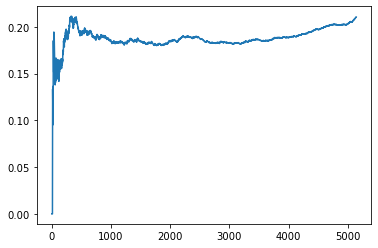

In [106]:
i = [x for x in range(fights.shape[0])]
plt.plot(i, fights.was_sub.cumsum() / i)

In [107]:
# Some jumping around at first, which is fine when the numbers are small.  But again, once it settles down, it has a 
# fairly constant slope of a little under 1 / 5.  Looks like it is slightly over 1/5 at the end.

In [108]:
(fights.was_sub.cumsum() / i).tail(50)

5094    0.206910
5095    0.207066
5096    0.207025
5097    0.206985
5098    0.207140
5099    0.207099
5100    0.207059
5101    0.207018
5102    0.207174
5103    0.207329
5104    0.207484
5105    0.207444
5106    0.207403
5107    0.207558
5108    0.207713
5109    0.207868
5110    0.208023
5111    0.208178
5112    0.208333
5113    0.208488
5114    0.208447
5115    0.208407
5116    0.208561
5117    0.208716
5118    0.208675
5119    0.208634
5120    0.208594
5121    0.208553
5122    0.208708
5123    0.208862
5124    0.209016
5125    0.208976
5126    0.209130
5127    0.209089
5128    0.209243
5129    0.209398
5130    0.209552
5131    0.209511
5132    0.209665
5133    0.209624
5134    0.209778
5135    0.209932
5136    0.210086
5137    0.210239
5138    0.210393
5139    0.210352
5140    0.210506
5141    0.210659
5142    0.210618
5143    0.210577
Name: was_sub, dtype: float64

In [109]:
fights.was_sub.sum() / fights.shape[0]

0.21053654743390357

In [110]:
ws.cumsum().tail(25)

5119    1068
5120    1068
5121    1068
5122    1069
5123    1070
5124    1071
5125    1071
5126    1072
5127    1072
5128    1073
5129    1074
5130    1075
5131    1075
5132    1076
5133    1076
5134    1077
5135    1078
5136    1079
5137    1080
5138    1081
5139    1081
5140    1082
5141    1083
5142    1083
5143    1083
Name: was_sub, dtype: int64

In [111]:
ws.sum()

1083

In [112]:
ws.cumsum().shape

(5144,)

In [113]:
ws.shape

(5144,)

In [114]:
i.tail()

AttributeError: 'list' object has no attribute 'tail'

In [115]:
i[5140:]

[5140, 5141, 5142, 5143]

In [116]:
1083 / 5143

0.21057748395877893

In [117]:
1083 / 5144

0.21053654743390357

In [118]:
ii = [x for x in range(1, fights.shape[0] + 1)]

In [119]:
(fights.was_sub.cumsum() / ii).tail(50)

5094    0.206869
5095    0.207025
5096    0.206985
5097    0.206944
5098    0.207099
5099    0.207059
5100    0.207018
5101    0.206978
5102    0.207133
5103    0.207288
5104    0.207444
5105    0.207403
5106    0.207362
5107    0.207518
5108    0.207673
5109    0.207828
5110    0.207983
5111    0.208138
5112    0.208293
5113    0.208447
5114    0.208407
5115    0.208366
5116    0.208521
5117    0.208675
5118    0.208634
5119    0.208594
5120    0.208553
5121    0.208512
5122    0.208667
5123    0.208821
5124    0.208976
5125    0.208935
5126    0.209089
5127    0.209048
5128    0.209203
5129    0.209357
5130    0.209511
5131    0.209470
5132    0.209624
5133    0.209583
5134    0.209737
5135    0.209891
5136    0.210045
5137    0.210199
5138    0.210352
5139    0.210311
5140    0.210465
5141    0.210618
5142    0.210577
5143    0.210537
Name: was_sub, dtype: float64

In [120]:
ii[5140:]

[5141, 5142, 5143, 5144]

In [121]:
# So go back to looking at finishing.

In [122]:
fights.win_by.value_counts()

Decision - Unanimous       1737
KO/TKO                     1647
Submission                 1083
Decision - Split            486
TKO - Doctor's Stoppage      70
Decision - Majority          56
Overturned                   35
DQ                           15
Could Not Continue           13
Other                         2
Name: win_by, dtype: int64

<AxesSubplot:xlabel='win_by', ylabel='count'>

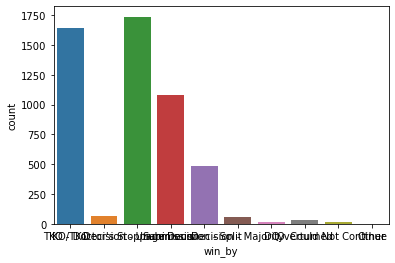

In [123]:
sns.countplot(fights.win_by)

In [124]:
# I thought there was a column that gave more information.  Maybe that was the other ufc data file I had.
# Yep.

In [125]:
ufc = pd.read_csv('ufc-master.csv')

In [126]:
ufc.finish.value_counts()

U-DEC         1543
KO/TKO        1291
SUB            758
S-DEC          435
M-DEC           26
DQ              12
Overturned       2
Name: finish, dtype: int64

In [127]:
758 / ufc.shape[0]

0.1766076421248835

In [128]:
# In this case. a little under a fifth.

In [129]:
subs = ufc[ufc.finish == 'SUB']

In [130]:
subs.finish_details.value_counts()

Rear Naked Choke     309
Guillotine Choke     143
Armbar                88
Arm Triangle          58
Triangle Choke        45
D'Arce Choke          23
Kimura                20
Other - Choke         14
Anaconda Choke        14
Kneebar               12
Heel Hook             10
Other - Lock           5
Neck Crank             5
North-South Choke      4
Injury                 3
Omoplata               2
Ankle Lock             1
Peruvian Necktie       1
Keylock                1
Name: finish_details, dtype: int64

In [131]:
ufc.finish_details.value_counts()

Punch                 485
Punches               429
Rear Naked Choke      310
Guillotine Choke      143
Kick                  113
Armbar                 88
Knee                   64
Arm Triangle           58
Elbows                 56
Triangle Choke         45
Elbow                  27
D'Arce Choke           24
Kimura                 20
Flying Knee            19
Knees                  16
Other - Choke          14
Anaconda Choke         14
Kneebar                12
Heel Hook              10
Spinning Back Fist      6
Spinning Back Kick      6
Slam                    6
Neck Crank              5
Other - Lock            5
North-South Choke       4
Injury                  3
Kicks                   2
Omoplata                2
Keylock                 1
Peruvian Necktie        1
Ankle Lock              1
Name: finish_details, dtype: int64

In [132]:
ufc.finish_details.shape

(4292,)

In [133]:
ufc.shape

(4292, 110)

In [134]:
not_sub = ufc[ufc.finish != 'SUB']

In [135]:
not_sub.finish_details.value_counts()

Punch                 485
Punches               429
Kick                  113
Knee                   64
Elbows                 56
Elbow                  27
Flying Knee            19
Knees                  16
Spinning Back Kick      6
Spinning Back Fist      6
Slam                    6
Kicks                   2
D'Arce Choke            1
Rear Naked Choke        1
Name: finish_details, dtype: int64

In [136]:
get_record('Randy Couture')

{'wins': 16, 'losses': 8, 'draws': 0, 'win loss ratio': 0.6666666666666666}

In [137]:
get_fights_for_fighter('Randy Couture')

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner,was_sub
3554,Lyoto Machida,Randy Couture,1,0,15 of 47,5 of 23,31,21,17 of 49,5 of 24,...,1,0,1.000000,0.000000,100,0,1,Randy Couture,r,0
3730,Randy Couture,James Toney,0,0,8 of 11,0 of 0,72,0,41 of 50,4 of 6,...,8,0,0.727273,0.000000,72,0,8,James Toney,r,1
3865,Randy Couture,Mark Coleman,0,0,44 of 67,10 of 21,65,47,68 of 93,16 of 27,...,8,0,0.800000,0.000000,80,0,8,Mark Coleman,r,1
3928,Randy Couture,Brandon Vera,0,1,39 of 73,27 of 51,53,52,59 of 97,44 of 69,...,0,2,0.000000,0.400000,0,40,-2,Brandon Vera,r,0
3973,Minotauro Nogueira,Randy Couture,2,0,27 of 96,42 of 103,28,40,133 of 215,65 of 126,...,1,7,1.000000,0.700000,100,70,-6,Randy Couture,r,0
4142,Brock Lesnar,Randy Couture,1,0,31 of 42,11 of 19,73,57,68 of 79,17 of 25,...,14,0,1.000000,0.000000,100,0,14,Randy Couture,r,0
4377,Randy Couture,Gabriel Gonzaga,0,0,63 of 87,11 of 38,72,28,82 of 106,12 of 39,...,15,0,0.750000,0.000000,75,0,15,Gabriel Gonzaga,r,0
4458,Randy Couture,Tim Sylvia,1,0,73 of 138,25 of 106,52,23,138 of 205,39 of 123,...,31,5,0.673913,1.000000,67,100,26,Tim Sylvia,r,0
4625,Chuck Liddell,Randy Couture,1,0,19 of 51,7 of 24,37,29,27 of 59,7 of 24,...,4,0,1.000000,0.000000,100,0,4,Randy Couture,r,0
4674,Randy Couture,Mike van Arsdale,0,0,27 of 46,8 of 40,58,20,40 of 60,9 of 41,...,19,0,0.760000,0.000000,76,0,19,Mike van Arsdale,r,1


Now, find the distribution of records and simulate the distribution of records that could happen by chance using a monte carlo.

In [141]:
list(fights.columns)

['r_fighter',
 'b_fighter',
 'r_kd',
 'b_kd',
 'r_sig_str',
 'b_sig_str',
 'r_sig_str_pct',
 'b_sig_str_pct',
 'r_total_str',
 'b_total_str',
 'r_td',
 'b_td',
 'r_td_pct',
 'b_td_pct',
 'r_sub_att',
 'b_sub_att',
 'r_pass',
 'b_pass',
 'r_rev',
 'b_rev',
 'r_head',
 'b_head',
 'r_body',
 'b_body',
 'r_leg',
 'b_leg',
 'r_distance',
 'b_distance',
 'r_clinch',
 'b_clinch',
 'r_ground',
 'b_ground',
 'win_by',
 'last_round',
 'last_round_time',
 'format',
 'referee',
 'date',
 'location',
 'fight_type',
 'winner',
 'r_sig_str_att',
 'b_sig_str_att',
 'r_sig_str_suc',
 'b_sig_str_suc',
 'r_sig_str_ratio',
 'b_sig_str_ratio',
 'sig_str_diff',
 'r_total_str_att',
 'b_total_str_att',
 'r_total_str_suc',
 'b_total_str_suc',
 'r_total_str_ratio',
 'b_total_str_ratio',
 'r_total_str_pct',
 'b_total_str_pct',
 'total_str_diff',
 'r_td_att',
 'b_td_att',
 'r_td_suc',
 'b_td_suc',
 'r_td_ratio',
 'b_td_ratio',
 'td_diff',
 'r_head_att',
 'b_head_att',
 'r_head_suc',
 'b_head_suc',
 'r_head_ratio'

In [143]:
fights.winner.isnull().sum()

0

In [163]:
(fights['winner'] == "None").sum()

83

In [166]:
tie_prob = (fights['winner'] == "None").sum() / fights.shape[0]
tie_prob

0.0161353032659409